In [1]:
import numpy as np
import scipy
import pylab as mplot
from scipy import interpolate as intrp
from scipy import integrate as intg
import scipy.optimize as op

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data_file0 = np.load('Planck_cluster_bootstrap_0.npz')
print(data_file0['mass'])
print(data_file0['z'])

8.735104
0.0557


In [46]:
h0 = 0.7
Om0 = 0.3
z_max = 40./h0
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100*h0, Om0=Om0)
from astropy import units as u

# first cluster has SZ mass M, assume SZ mass scales with M500, assume know R500 for first cluster is 18 arcmin
def M500_to_R500m(mass, z, cosmo):
    rho_m_z = cosmo.Om(z)*cosmo.critical_density(z)
    mass_units = mass*u.Msun
    R500m = ((mass_units/(500.*4.*np.pi*rho_m_z/3.))**(1./3.)).to('Mpc')
    return R500m.value

R500_MSZ = M500_to_R500m(data_file0['mass']*10**14, data_file0['z'], cosmo)
print(R500_MSZ*(1+data_file0['z'])/(18./60/180*np.pi))
print(cosmo.comoving_distance(data_file0['z']).value)
Factor = R500_MSZ*(1+data_file0['z'])/(18./60/180*np.pi)/cosmo.comoving_distance(data_file0['z']).value

print(M500_to_R500m(data_file0['mass']*10**14/Factor**3, data_file0['z'], cosmo)*(1+data_file0['z'])/(18./60/180*np.pi))

414.50074263959516
235.52581162872076
235.52581162872076


In [47]:
data_file0 = np.load('Planck_cluster_bootstrap_0.npz')

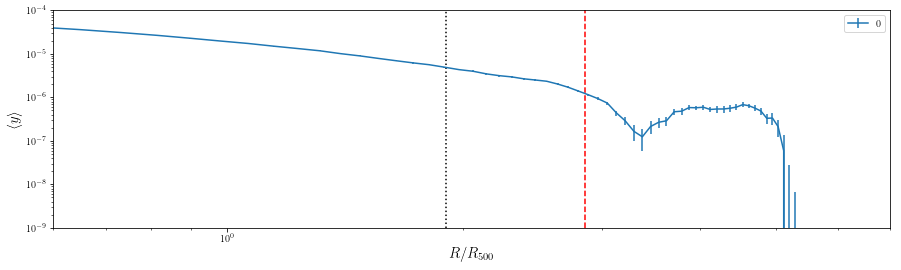

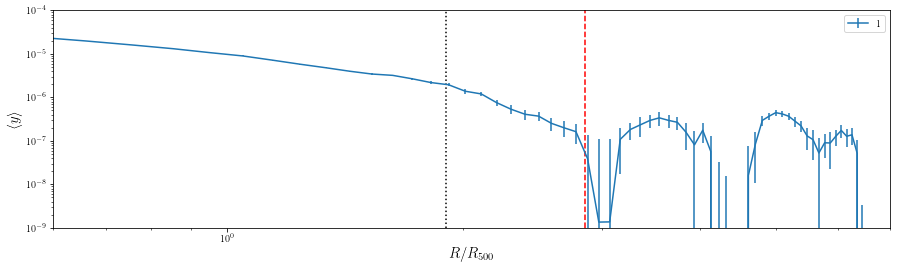

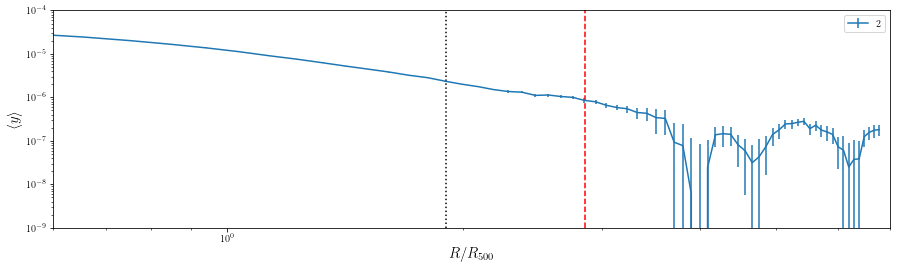

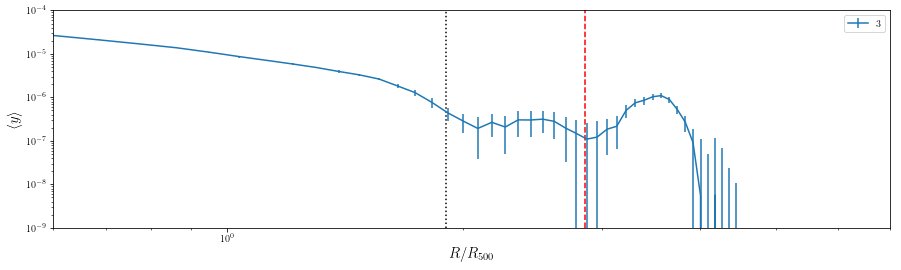

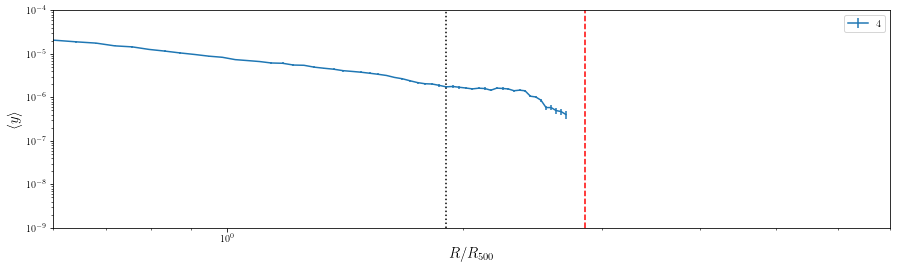

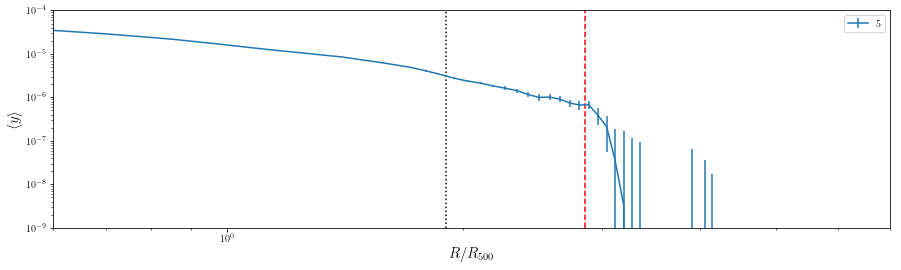

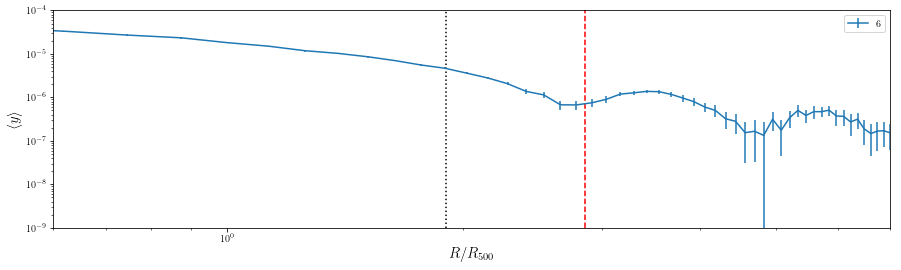

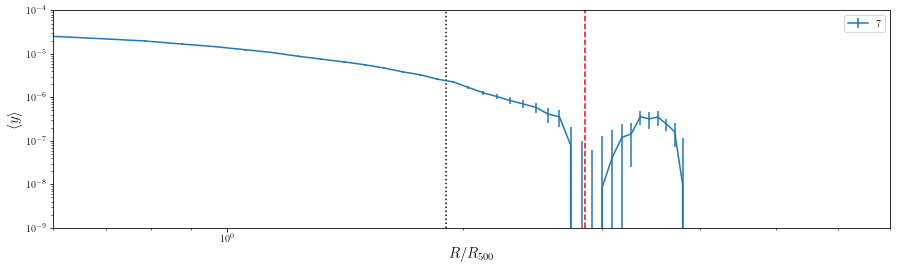

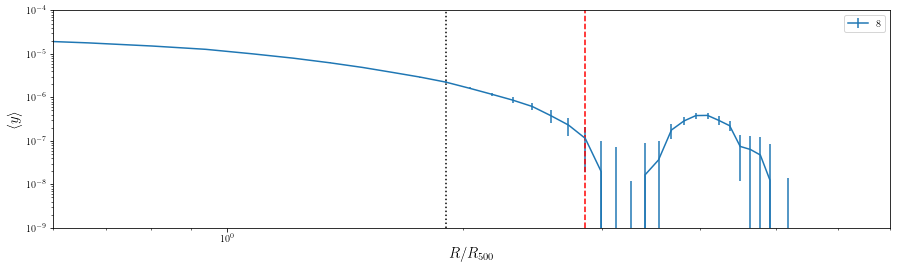

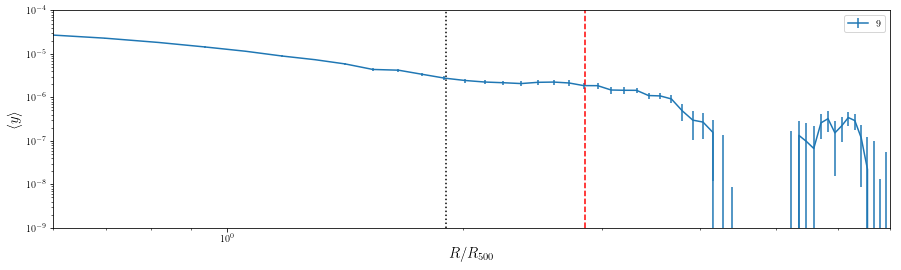

In [54]:
N = 70
for i in range(10):
    data_file = np.load('Planck_cluster_bootstrap_'+str(i)+'.npz')
    data_vec = data_file['mean_y'][:N] - data_file['bg']
    invcov = np.linalg.inv(data_file['cov'][:N, :N])

    # first cluster has R500=18'
    M1 = data_file['mass']*10**14/Factor**3
    R500 = (1+data_file['z'])*M500_to_R500m(data_file['mass']*10**14/Factor**3, data_file0['z'], cosmo)/cosmo.comoving_distance(data_file['z']).value /np.pi*180.*60
#     print(R500)
    R = data_file['theta'][:N] / R500
    mplot.figure(figsize=(15,4))
    mplot.plot([2.86,2.86],[1e-9, 1e-4], color='r', ls='--')
    mplot.plot([1.9,1.9],[1e-9, 1e-4], color='k', ls=':')

    mplot.errorbar(R, data_vec, yerr=np.diag(data_file['cov'][:N, :N])**0.5, label=str(i))
    mplot.legend()
    mplot.xscale('log')
    mplot.yscale('log')
    mplot.xlabel('$R/R_{500}$', fontsize=15)
    mplot.ylabel('$\\langle y  \\rangle$', fontsize=15)
    mplot.xlim(0.6,7)
    mplot.ylim(1e-9, 1e-4)